# Comparison of nearline files from v9_15, v8_04 newly processed, and v8_04 stored from original processing in 2018

In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.12/06


In [2]:
#f9 = r.TFile("./nearlineHists_v9_15_g2nearline1_run17969_00071_fixedIncludes.root")
f9 = r.TFile("./nearlineHists_v9_15_g2nearline1_run17969_00071_changeCaloConfig.root") #changed caloconfig parameter
f8 = r.TFile("./nearlineHists_run17969_00071_v8_04_g2nearline2.root")
fdb = r.TFile("./gm2nearline_hists_run17969_00071.root")

Warning in <TClass::Init>: no dictionary for class gm2aux::IBMSRawArtRecord is available


In [3]:
f9.ls()

TFile**		./nearlineHists_v9_15_g2nearline1_run17969_00071_changeCaloConfig.root	
 TFile*		./nearlineHists_v9_15_g2nearline1_run17969_00071_changeCaloConfig.root	
  KEY: TDirectoryFile	nearlineHistTree;1	nearlineHistTree (CaloNearlineHistograms) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder
  KEY: TDirectoryFile	t0Analyzer;1	t0Analyzer (T0PulseProcessorAnalyzer) folder
  KEY: TDirectoryFile	ibmsAnalyzer;1	ibmsAnalyzer (IBMSAnalyzer) folder
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder


---

### Let's start with the nearlineHistTree

In [4]:
t9 = f9.Get("nearlineHistTree").Get("eventTree")
t8 = f8.Get("nearlineHistTree").Get("eventTree")
tdb = fdb.Get("nearlineHistTree").Get("eventTree")

t8.SetLineColor(2)
tdb.SetLineColor(3)

In [5]:
t9.Print()

******************************************************************************
*Tree    :eventTree : eventTree                                              *
*Entries :       44 : Total =         3163694 bytes  File  Size =    2292027 *
*        :          : Tree compression factor =   1.38                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :       44 : Total  Size=        743 bytes  File Size  =        102 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   2.49     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :       44 : Total  Size=        758 bytes  File Size  =        105 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   2.45     *
*...................................................

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


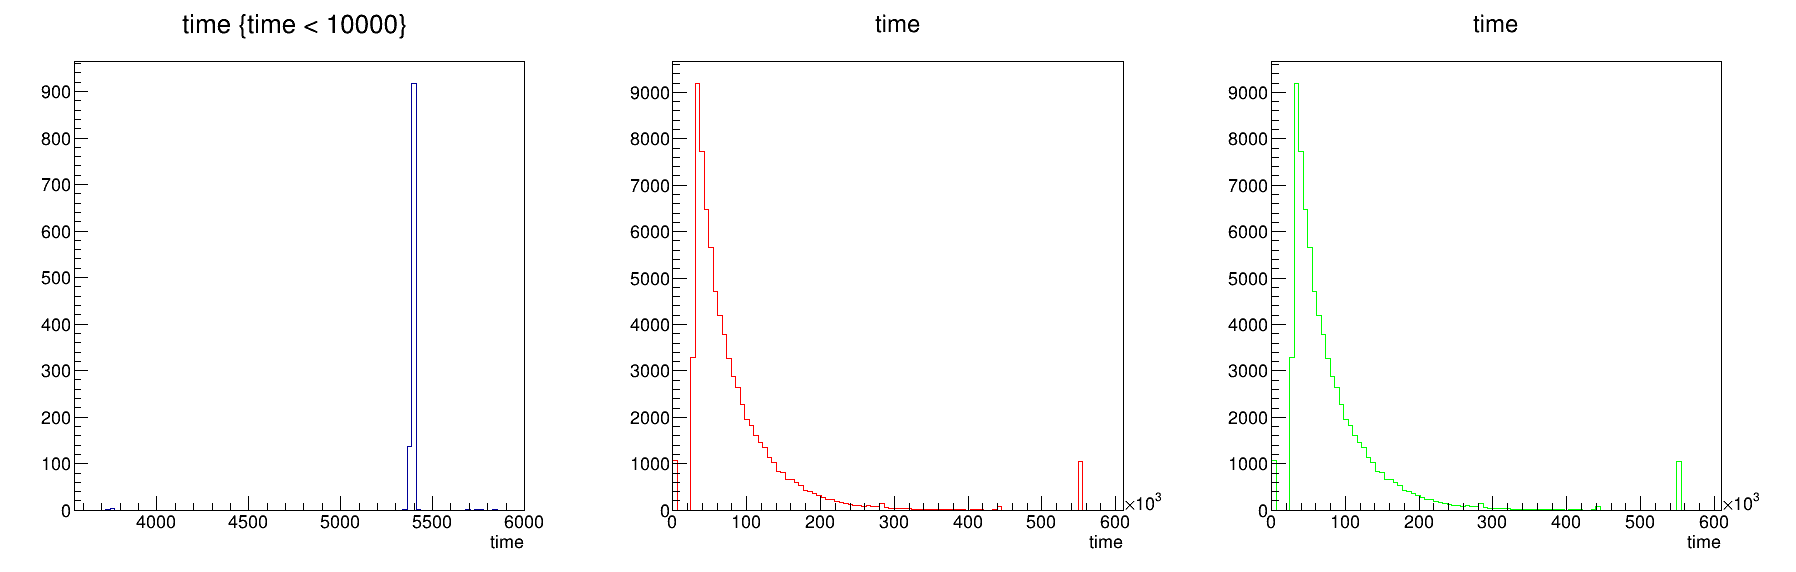

In [36]:
c = r.TCanvas("c","c",1800,600)
c.Divide(3,1)
c.cd(1)
t9.Draw("time" ,"time < 10000")
c.cd(2)
t8.Draw("time")
c.cd(3)
tdb.Draw("time")
c.Draw()

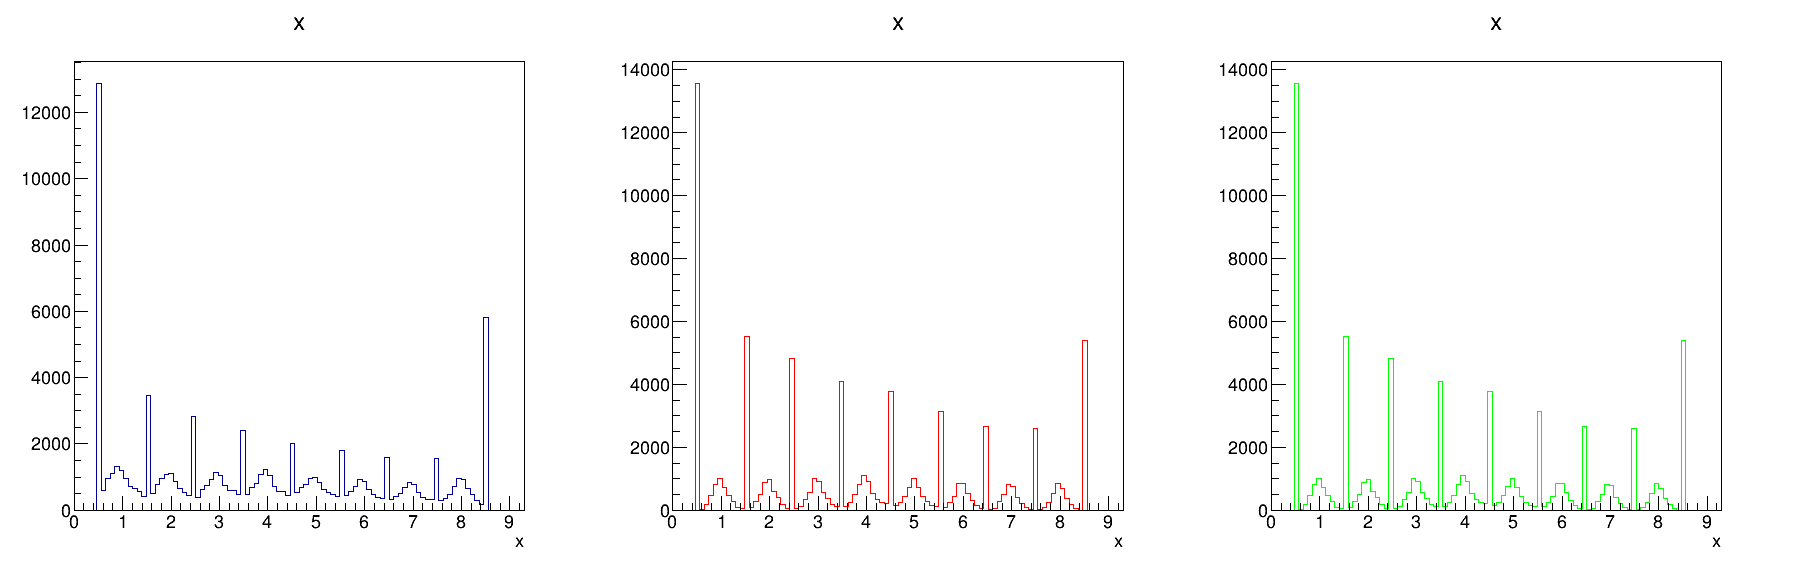

In [6]:
c = r.TCanvas("c","c",1800,600)
c.Divide(3,1)
c.cd(1)
t9.Draw("x")
c.cd(2)
t8.Draw("x")
c.cd(3)
tdb.Draw("x")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


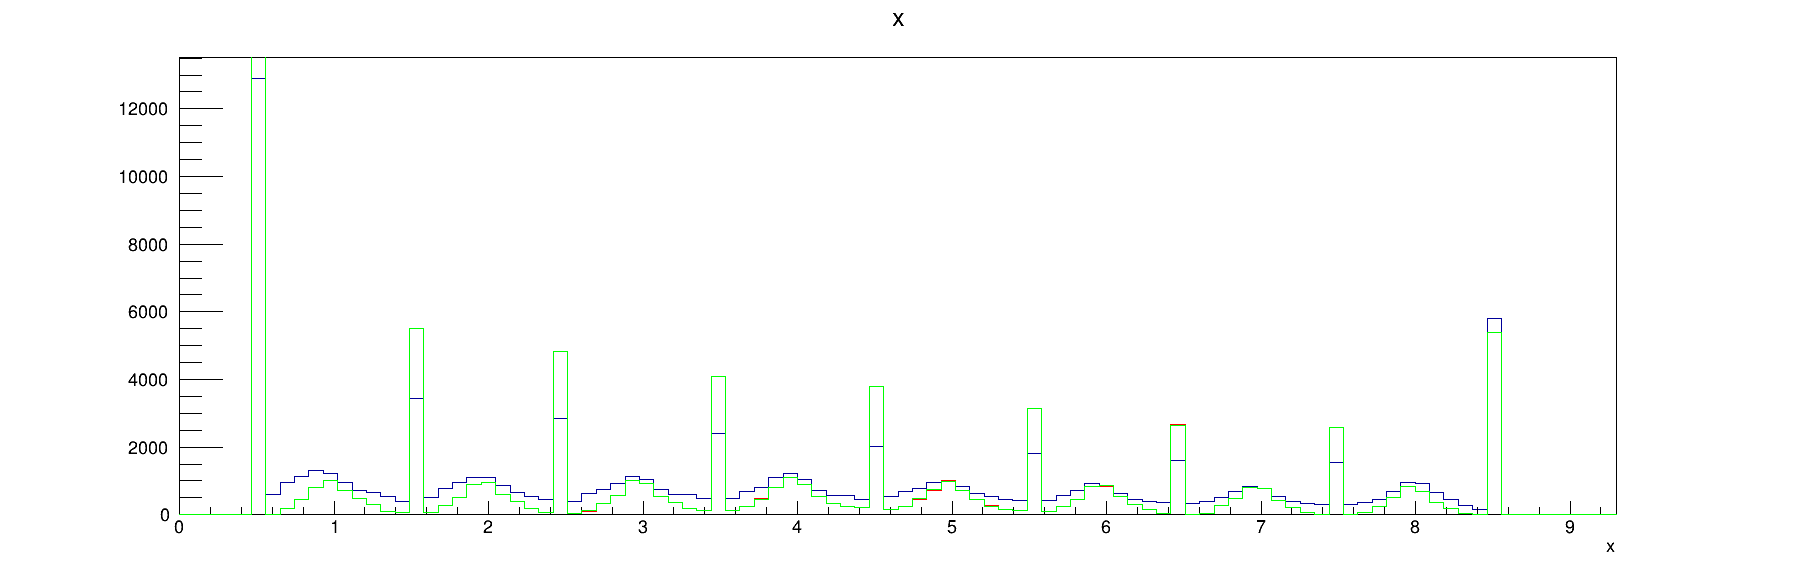

In [7]:
c = r.TCanvas("c","c",1800,600)
t9.Draw("x")
t8.Draw("x","","same")
tdb.Draw("x","","same")
c.Draw()

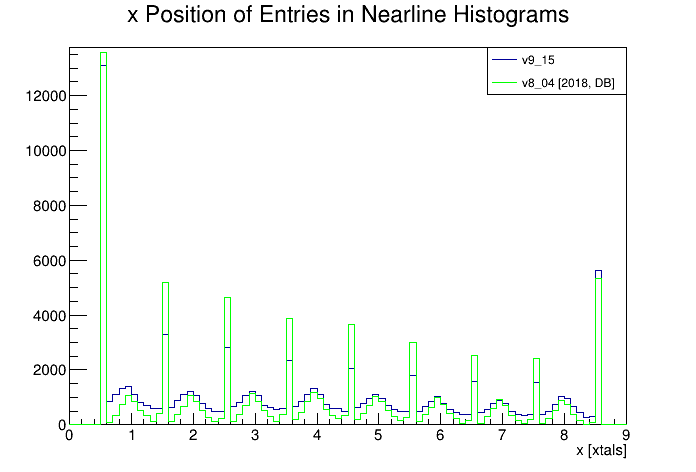

In [8]:
h9 = r.TH1D("h9","x Position of Entries in Nearline Histograms; x [xtals]",90,0,9)
hdb = r.TH1D("hdb","v8_04 [2018]; x [xtals]",90,0,9)

t9.Draw("x>>h9","","goff")
tdb.Draw("x>>hdb","","goff")

c = r.TCanvas()
h9.Draw()
hdb.SetLineColor(3)
hdb.Draw("SAME")

leg = r.TLegend(0.7,0.8,0.9,0.9)
leg.AddEntry("h9","v9_15","l")
leg.AddEntry("hdb","v8_04 [2018, DB]",'l')
leg.Draw()

c.Draw()

In [9]:
print(h9.GetEntries())
print(hdb.GetEntries())

87250.0
76866.0


In [10]:
print(h9.GetEntries())
print(hdb.GetEntries())

87250.0
76866.0


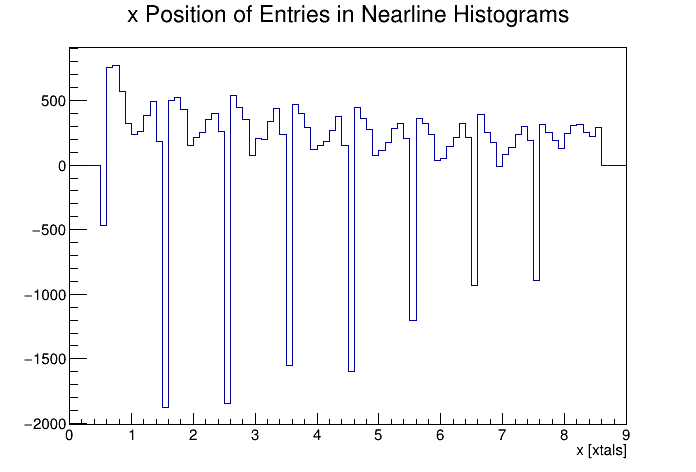

In [11]:
hdiff = h9.Clone("hdiff")
hdiff.Reset()
hdiff.Add(h9,1)
hdiff.Add(hdb,-1)
hdiff.Draw()
c.Draw()

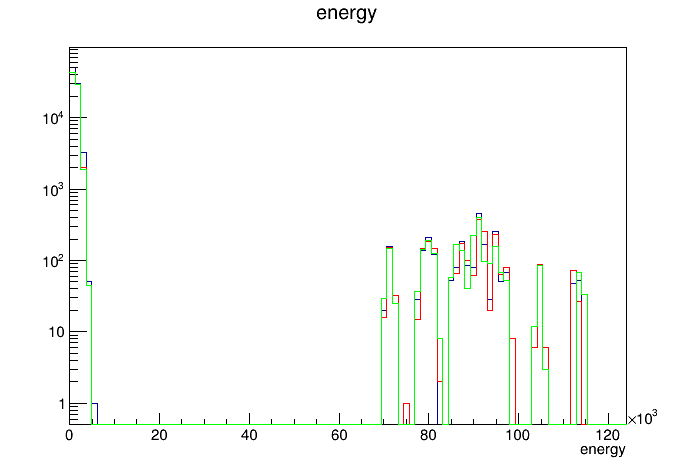

In [12]:
c = r.TCanvas()
t9.Draw("energy")
t8.Draw("energy","","same")
tdb.Draw("energy","","same")
c.SetLogy()
c.Draw()

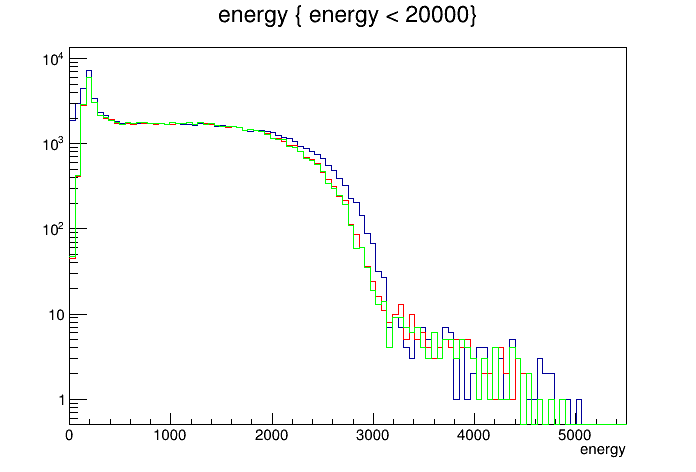

In [13]:
c = r.TCanvas()
t9.Draw("energy"," energy < 20000")
t8.Draw("energy","","same")
tdb.Draw("energy","","same")
c.SetLogy()
c.Draw()

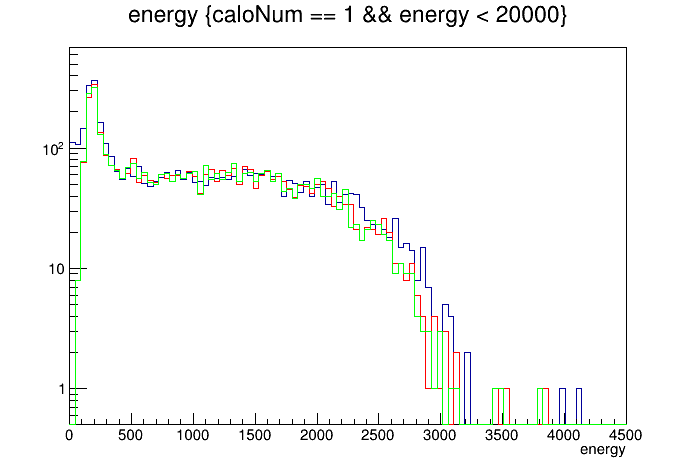

In [14]:
c = r.TCanvas()
t9.Draw("energy","caloNum == 1 && energy < 20000")
t8.Draw("energy","caloNum == 1","same")
tdb.Draw("energy","caloNum == 1","same")
c.SetLogy()
c.Draw()

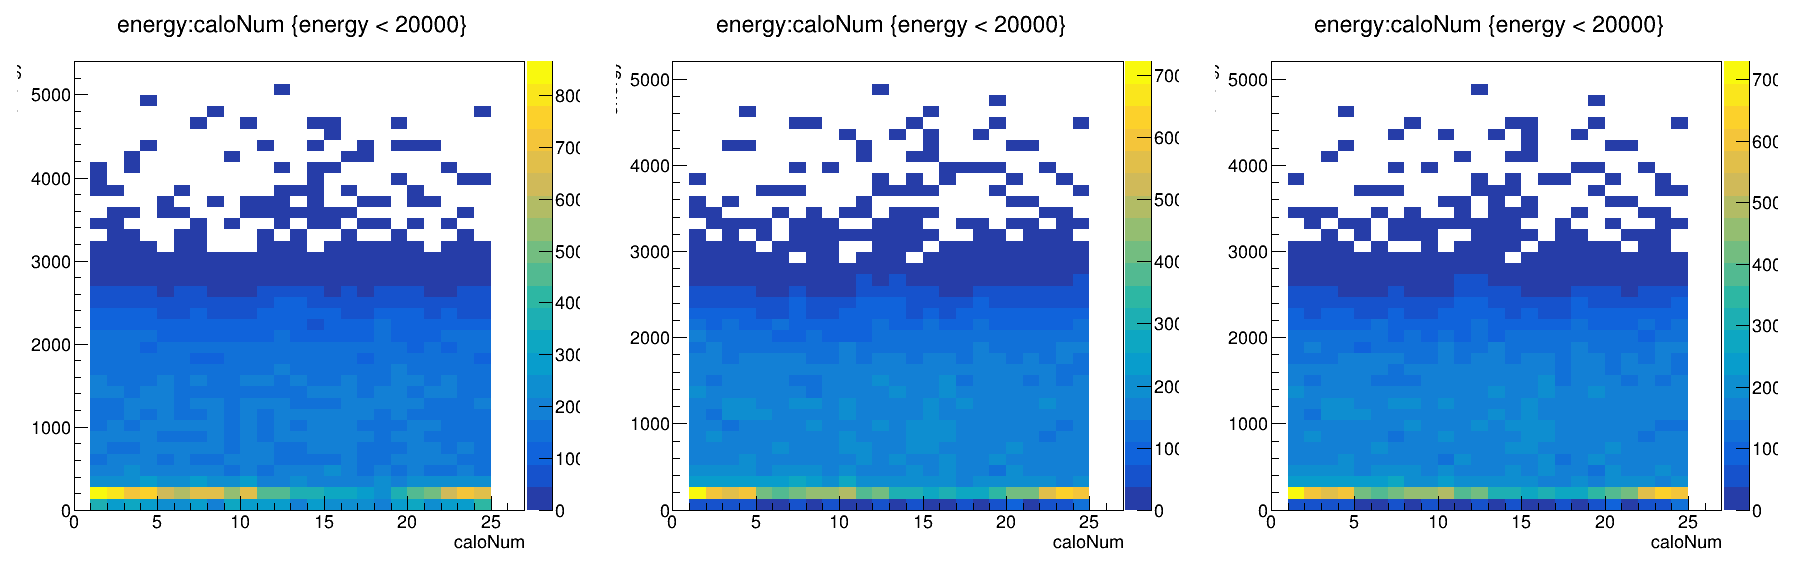

In [15]:
c = r.TCanvas("c","c",1800,600)

c.Divide(3,1)
c.cd(1)
t9.Draw("energy:caloNum","energy < 20000","colz")
c.cd(2)
t8.Draw("energy:caloNum","energy < 20000","colz")
c.cd(3)
tdb.Draw("energy:caloNum","energy < 20000","colz")
c.SetLogy()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h9 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hdb (Potential memory leak).


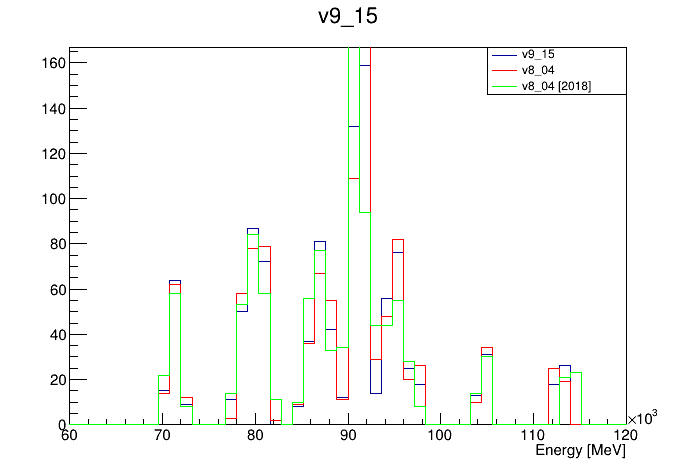

In [16]:
h9 = r.TH1D("h9","v9_15; Energy [MeV]",50,60000,120000)
h8 = r.TH1D("h8","v8_04; Energy [MeV]",50,60000,120000)
hdb = r.TH1D("hdb","v8_04 [2018]; Energy [MeV]",50,60000,120000)

t9.Draw("energy>>h9","energy > 20000 && time < 10000","goff")
t8.Draw("energy>>h8","energy > 20000 && time < 10000","goff")
tdb.Draw("energy>>hdb","energy > 20000 && time < 10000","goff")

c = r.TCanvas()
h9.Draw()
h8.SetLineColor(2)
h8.Draw("SAME")
hdb.SetLineColor(3)
hdb.Draw("SAME")

leg = r.TLegend(0.7,0.8,0.9,0.9)
leg.AddEntry("h9","v9_15","l")
leg.AddEntry("h8","v8_04","l")
leg.AddEntry("hdb","v8_04 [2018]",'l')
leg.Draw()

c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h9 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h8 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hdb (Potential memory leak).


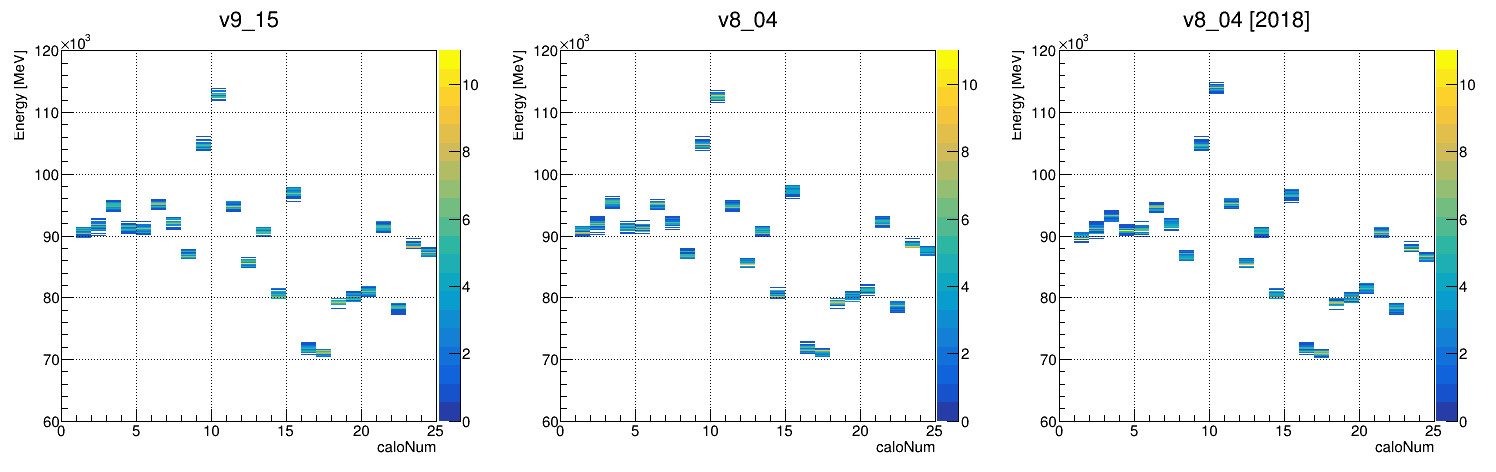

In [17]:
c = r.TCanvas("c","c",1500,500)
c.Divide(3,1)

c.cd(1)
h9 = r.TH2D("h9","v9_15; caloNum; Energy [MeV]",25,0,25,500,60000,120000)
t9.Draw("energy:caloNum>>h9","energy>20000 && time > 500000 ","goff")
h9.Draw("COLZ")
r.gPad.SetGrid()

c.cd(2)
h8 = r.TH2D("h8","v8_04; caloNum; Energy [MeV]",25,0,25,500,60000,120000)
t8.Draw("energy:caloNum>>h8","energy>20000 && time > 500000 ","goff")
h8.Draw("colz")
r.gPad.SetGrid()

c.cd(3)
hdb = r.TH2D("hdb","v8_04 [2018]; caloNum; Energy [MeV]",25,0,25,500,60000,120000)
tdb.Draw("energy:caloNum>>hdb","energy>20000 && time > 500000 ","goff")
hdb.Draw("colz")
r.gPad.SetGrid()

c.Draw()

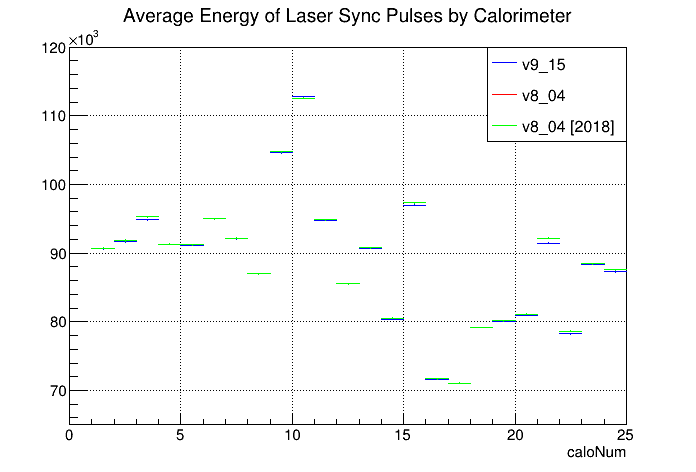

In [18]:
c2 = r.TCanvas()

Eprof9 = h9.ProfileX().Clone("Eprof9")
Eprof9.SetTitle("Average Energy of Laser Sync Pulses by Calorimeter")
Eprof9.GetYaxis().SetRangeUser(65000,120000)
Eprof9.SetLineColor(4)
Eprof9.SetMarkerColor(4)
Eprof9.Draw("")

Eprof8 = h8.ProfileX().Clone("Eprof8")
Eprof8.SetTitle("Average Values of Laser Pulses by Calorimeter")
Eprof8.SetLineColor(2)
Eprof8.SetMarkerColor(2)
Eprof8.Draw("SAME")

Eprofdb = h8.ProfileX().Clone("Eprofdb")
Eprofdb.SetTitle("Average Values of Laser Pulses by Calorimeter")
Eprofdb.SetLineColor(3)
Eprofdb.SetMarkerColor(3)
Eprofdb.Draw("SAME")


leg = r.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry("Eprof9","v9_15","pl")
leg.AddEntry("Eprof8","v8_04","pl")
leg.AddEntry("Eprofdb","v8_04 [2018]","pl")
leg.Draw()

c2.SetGrid()
c2.Draw()

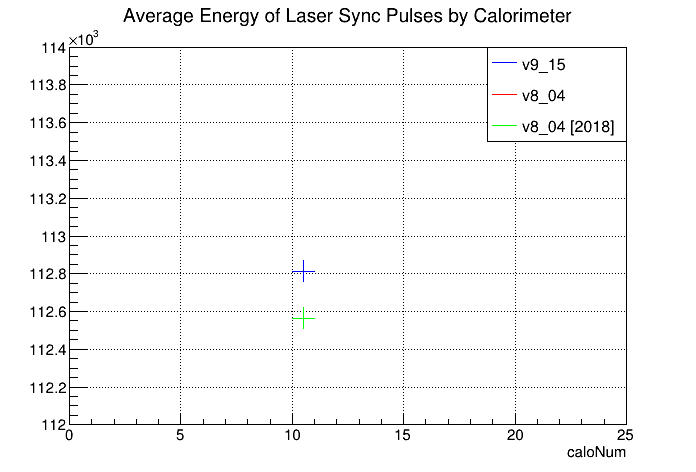

In [19]:
c2 = r.TCanvas()

Eprof9 = h9.ProfileX().Clone("Eprof9")
Eprof9.SetTitle("Average Energy of Laser Sync Pulses by Calorimeter")
Eprof9.GetYaxis().SetRangeUser(112000,114000)
Eprof9.SetLineColor(4)
Eprof9.SetMarkerColor(4)
Eprof9.Draw("")

Eprof8 = h8.ProfileX().Clone("Eprof8")
Eprof8.SetTitle("Average Values of Laser Pulses by Calorimeter")
Eprof8.SetLineColor(2)
Eprof8.SetMarkerColor(2)
Eprof8.Draw("SAME")

Eprofdb = h8.ProfileX().Clone("Eprofdb")
Eprofdb.SetTitle("Average Values of Laser Pulses by Calorimeter")
Eprofdb.SetLineColor(3)
Eprofdb.SetMarkerColor(3)
Eprofdb.Draw("SAME")


leg = r.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry("Eprof9","v9_15","pl")
leg.AddEntry("Eprof8","v8_04","pl")
leg.AddEntry("Eprofdb","v8_04 [2018]","pl")
leg.Draw()

c2.SetGrid()
c2.Draw()

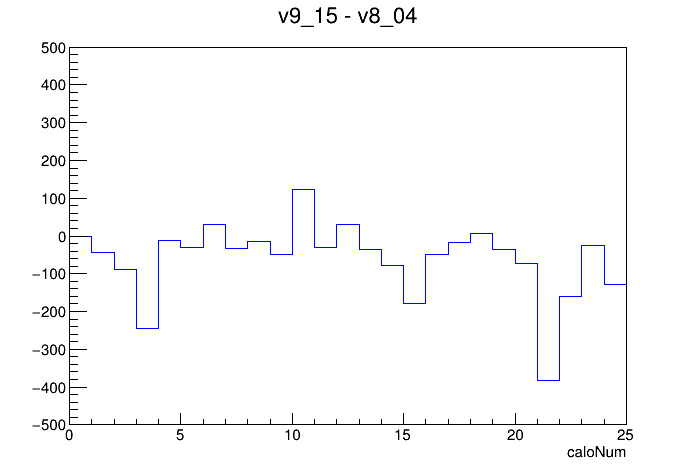

In [34]:
hdiff = Eprof9.Clone()
hdiff.Add(Eprofdb,-1)
c3 = r.TCanvas()
hdiff.Draw("HIST")
hdiff.SetTitle("v9_15 - v8_04")
hdiff.GetYaxis().SetRangeUser(-500,500)
c3.Draw()

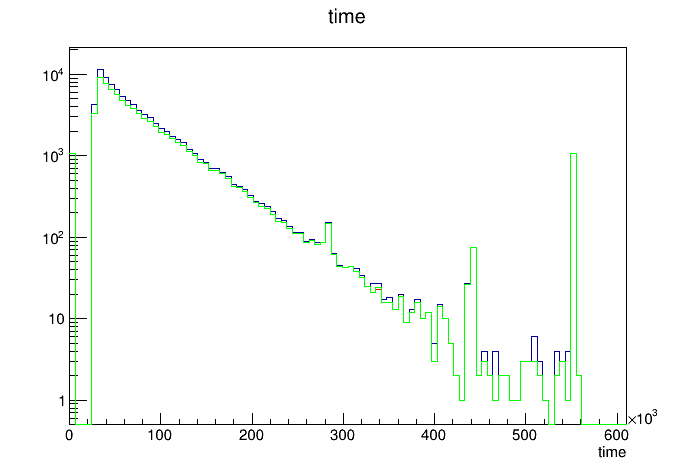

In [21]:
c = r.TCanvas()

t9.Draw("time")
t8.Draw("time","","same")
tdb.Draw("time","","same")

c.SetLogy()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h9 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h8 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hdb (Potential memory leak).


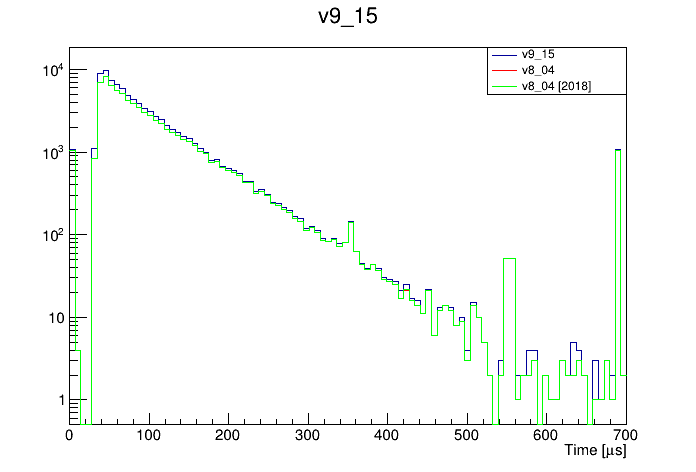

In [22]:
h9 = r.TH1D("h9","v9_15; Time [#mus]",100,0,700)
h8 = r.TH1D("h8","v8_04; Time [#mus]",100,0,700)
hdb = r.TH1D("hdb","v8_04 [2018]; Time [#mus]",100,0,700)

t9.Draw("time*1.25/1000>>h9","","goff")
t8.Draw("time*1.25/1000>>h8","","goff")
tdb.Draw("time*1.25/1000>>hdb","","goff")

c = r.TCanvas()
h9.Draw()
h8.SetLineColor(2)
h8.Draw("SAME")
hdb.SetLineColor(3)
hdb.Draw("SAME")

leg = r.TLegend(0.7,0.8,0.9,0.9)
leg.AddEntry("h9","v9_15","l")
leg.AddEntry("h8","v8_04","l")
leg.AddEntry("hdb","v8_04 [2018]",'l')
leg.Draw()

c.SetLogy()
c.Draw()

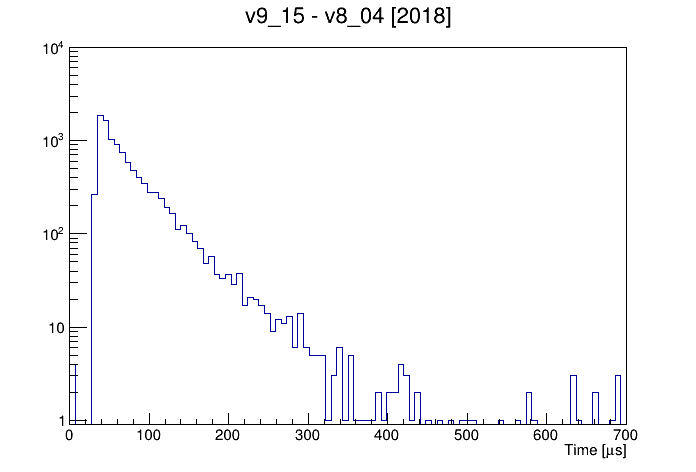

In [23]:
hdiff = h9.Clone()
hdiff.Add(hdb,-1)
c3 = r.TCanvas()
hdiff.Draw("HIST")
hdiff.SetTitle("v9_15 - v8_04 [2018]")
hdiff.GetYaxis().SetRangeUser(0.9,10000)
c3.SetLogy()
c3.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h9 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h9 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h8 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hdb (Potential memory leak).


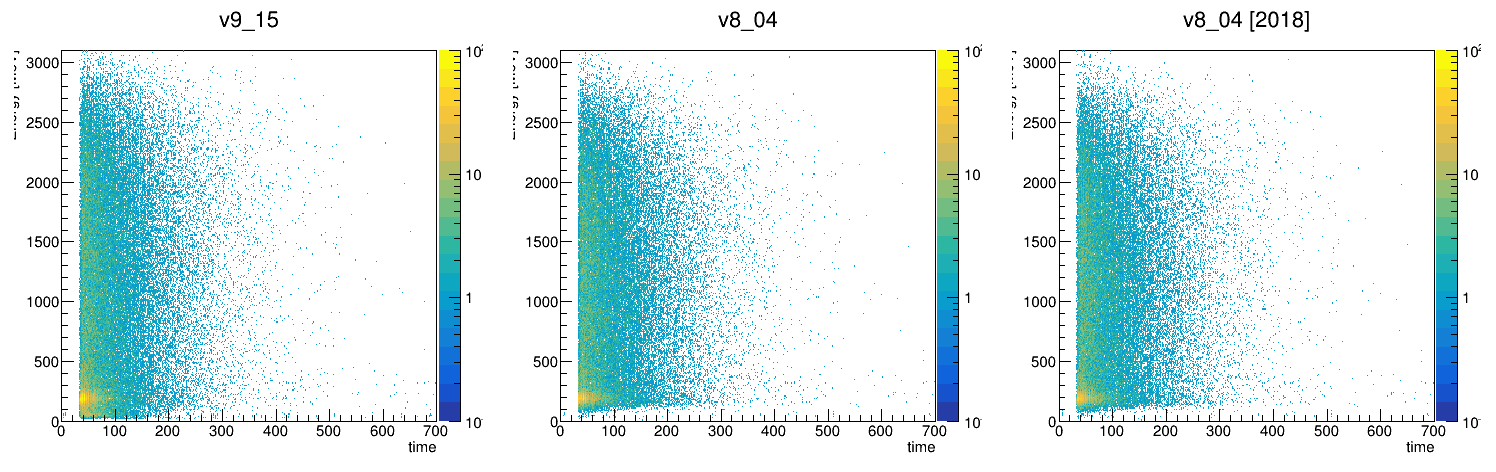

In [24]:
c = r.TCanvas("c","c",1500,500)
c.Divide(3,1)
c.cd(1)
h9 = r.TH2D("h9","v9_15; time; Energy [MeV]",700,0,700,310,0,3100)
t9.Draw("energy:time*1.25/1000.>>h9","","goff")
h9.Draw("COLZ")
h9.GetZaxis().SetRangeUser(0.1,100)
r.gPad.SetLogz()
c.cd(2)
h8 = r.TH2D("h8","v8_04; time; Energy [MeV]",700,0,700,310,0,3100)
t8.Draw("energy:time*1.25/1000.>>h8","","goff")
h8.Draw("colz")
r.gPad.SetLogz()
h8.GetZaxis().SetRangeUser(0.1,100)
c.cd(3)
hdb = r.TH2D("hdb","v8_04 [2018]; time; Energy [MeV]",700,0,700,310,0,3100)
tdb.Draw("energy:time*1.25/1000.>>hdb","","goff")
hdb.Draw("colz")
r.gPad.SetLogz()
hdb.GetZaxis().SetRangeUser(0.1,100)

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


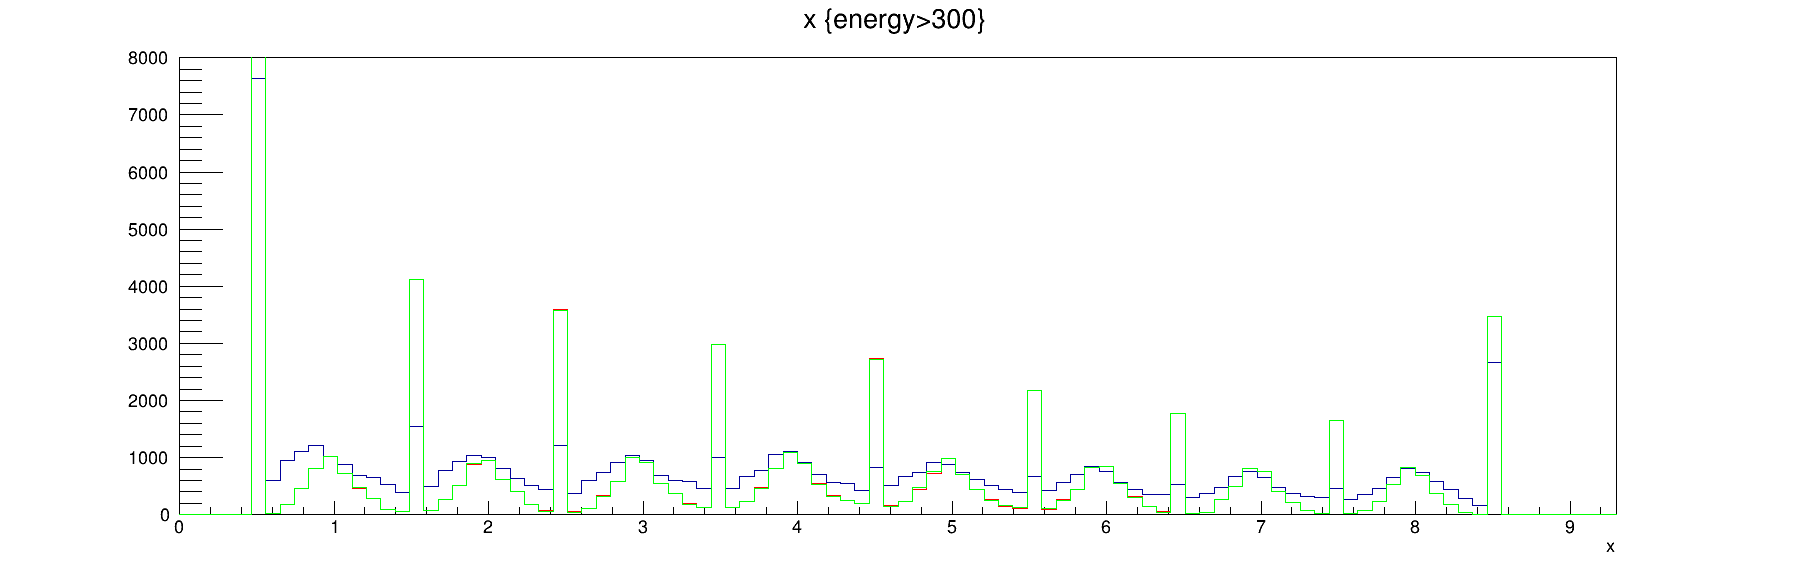

In [25]:
c = r.TCanvas("c","c",1800,600)
t9.Draw("x","energy>300")
t8.Draw("x","energy>300","same")
tdb.Draw("x","energy>300","same")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


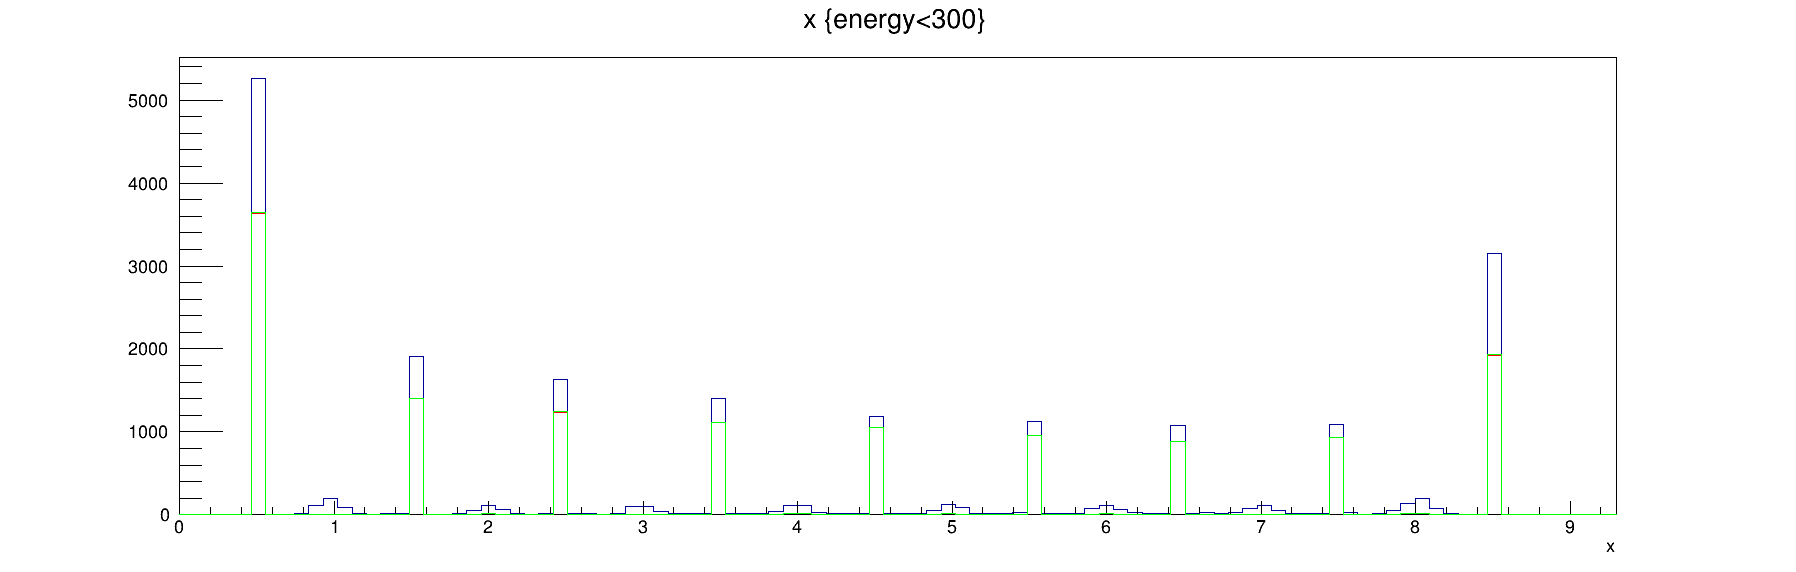

In [26]:
c = r.TCanvas("c","c",1800,600)
t9.Draw("x","energy<300")
t8.Draw("x","energy<300","same")
tdb.Draw("x","energy<300","same")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


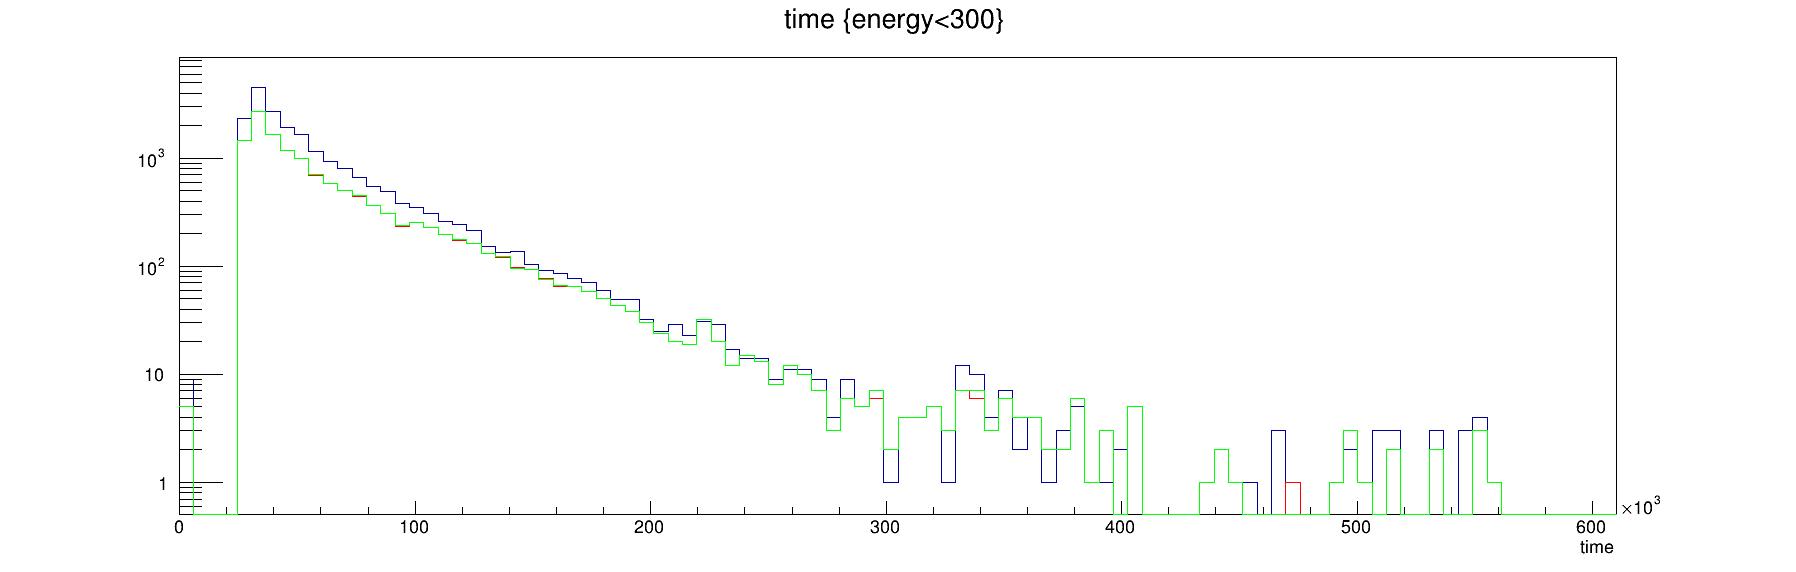

In [27]:
c = r.TCanvas("c","c",1800,600)
t9.Draw("time","energy<300")
t8.Draw("time","energy<300","same")
tdb.Draw("time","energy<300","same")
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h9 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h8 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hdb (Potential memory leak).


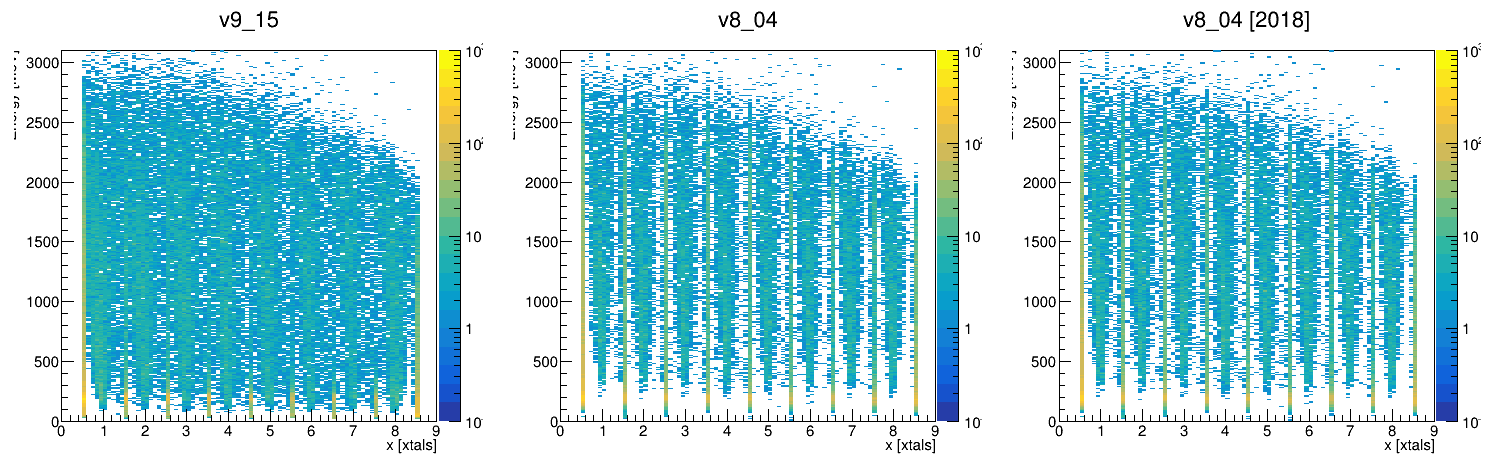

In [28]:
c = r.TCanvas("c","c",1500,500)
c.Divide(3,1)
c.cd(1)
h9 = r.TH2D("h9","v9_15; x [xtals]; Energy [MeV]",90,0,9,310,0,3100)
t9.Draw("energy:x>>h9","","goff")
h9.Draw("COLZ")
h9.GetZaxis().SetRangeUser(0.1,1000)
r.gPad.SetLogz()
c.cd(2)
h8 = r.TH2D("h8","v8_04; x [xtals]; Energy [MeV]",90,0,9,310,0,3100)
t8.Draw("energy:x>>h8","","goff")
h8.Draw("colz")
r.gPad.SetLogz()
h8.GetZaxis().SetRangeUser(0.1,1000)
c.cd(3)
hdb = r.TH2D("hdb","v8_04 [2018]; x [xtals]; Energy [MeV]",90,0,9,310,0,3100)
tdb.Draw("energy:x>>hdb","","goff")
hdb.Draw("colz")
r.gPad.SetLogz()
hdb.GetZaxis().SetRangeUser(0.1,1000)

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h9 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h8 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hdb (Potential memory leak).


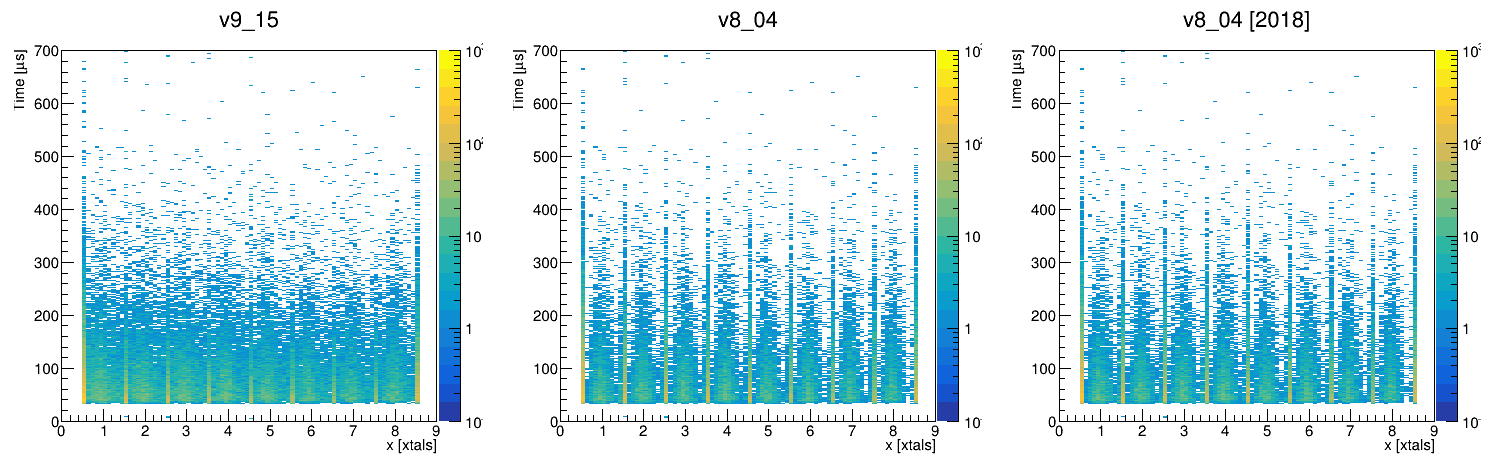

In [29]:
c = r.TCanvas("c","c",1500,500)
c.Divide(3,1)
c.cd(1)
h9 = r.TH2D("h9","v9_15; x [xtals]; Time [#mus]",90,0,9,700,0,700)
t9.Draw("time*1.25/1000.:x>>h9","energy < 20000","goff")
h9.Draw("COLZ")
h9.GetZaxis().SetRangeUser(0.1,1000)
r.gPad.SetLogz()
c.cd(2)
h8 = r.TH2D("h8","v8_04; x [xtals]; Time [#mus]",90,0,9,700,0,700)
t8.Draw("time*1.25/1000.:x>>h8","energy < 20000","goff")
h8.Draw("colz")
r.gPad.SetLogz()
h8.GetZaxis().SetRangeUser(0.1,1000)
c.cd(3)
hdb = r.TH2D("hdb","v8_04 [2018]; x [xtals]; Time [#mus]",90,0,9,700,0,700)
tdb.Draw("time*1.25/1000.:x>>hdb","energy < 20000","goff")
hdb.Draw("colz")
r.gPad.SetLogz()
hdb.GetZaxis().SetRangeUser(0.1,1000)

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h9 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h8 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hdb (Potential memory leak).


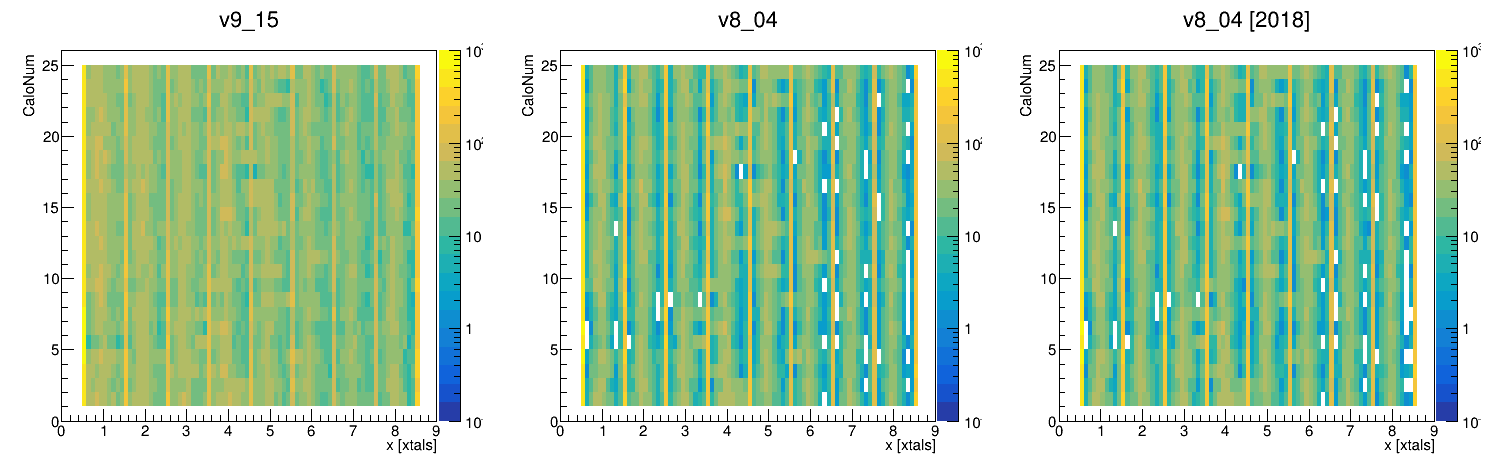

In [30]:
c = r.TCanvas("c","c",1500,500)
c.Divide(3,1)
c.cd(1)
h9 = r.TH2D("h9","v9_15; x [xtals]; CaloNum ",90,0,9,26,0,26)
t9.Draw("caloNum:x>>h9","","goff")
h9.Draw("COLZ")
h9.GetZaxis().SetRangeUser(0.1,1000)
r.gPad.SetLogz()
c.cd(2)
h8 = r.TH2D("h8","v8_04; x [xtals]; CaloNum ",90,0,9,26,0,26)
t8.Draw("caloNum:x>>h8","","goff")
h8.Draw("colz")
r.gPad.SetLogz()
h8.GetZaxis().SetRangeUser(0.1,1000)
c.cd(3)
hdb = r.TH2D("hdb","v8_04 [2018]; x [xtals]; CaloNum ",90,0,9,26,0,26)
tdb.Draw("caloNum:x>>hdb","","goff")
hdb.Draw("colz")
r.gPad.SetLogz()
hdb.GetZaxis().SetRangeUser(0.1,1000)

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h9 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h8 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hdb (Potential memory leak).


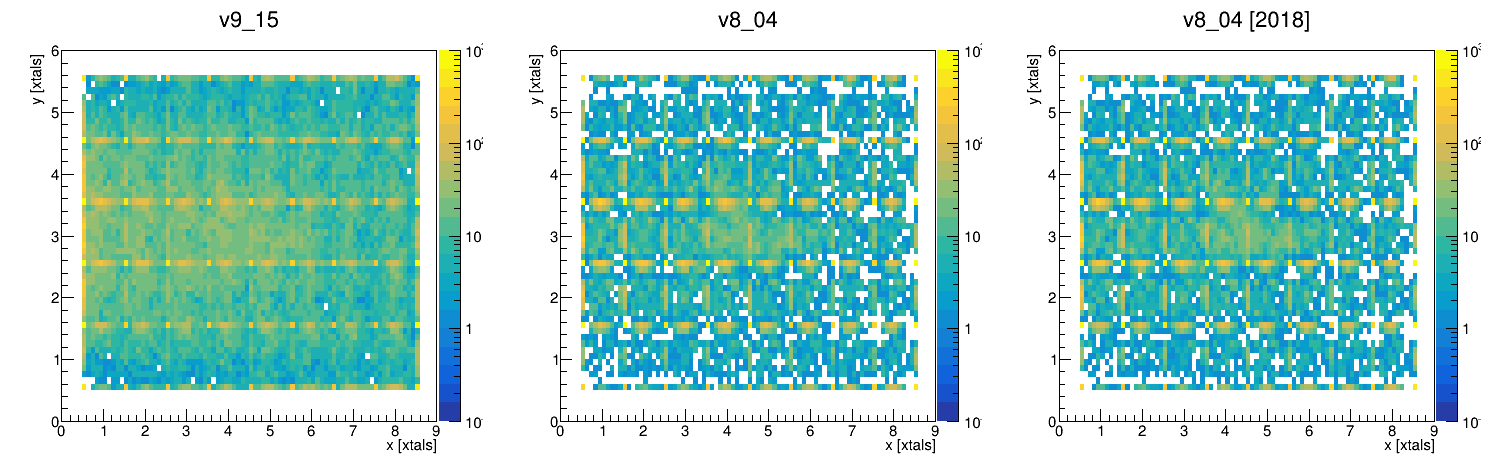

In [31]:
c = r.TCanvas("c","c",1500,500)
c.Divide(3,1)
c.cd(1)
h9 = r.TH2D("h9","v9_15; x [xtals]; y [xtals] ",90,0,9,60,0,6)
t9.Draw("y:x>>h9","","goff")
h9.Draw("COLZ")
h9.GetZaxis().SetRangeUser(0.1,1000)
r.gPad.SetLogz()
c.cd(2)
h8 = r.TH2D("h8","v8_04; x [xtals]; y [xtals] ",90,0,9,60,0,6)
t8.Draw("y:x>>h8","","goff")
h8.Draw("colz")
r.gPad.SetLogz()
h8.GetZaxis().SetRangeUser(0.1,1000)
c.cd(3)
hdb = r.TH2D("hdb","v8_04 [2018]; x [xtals]; y [xtals] ",90,0,9,60,0,6)
tdb.Draw("y:x>>hdb","","goff")
hdb.Draw("colz")
r.gPad.SetLogz()
hdb.GetZaxis().SetRangeUser(0.1,1000)

c.Draw()

In [32]:
stop

NameError: name 'stop' is not defined

---

### Now lets go to the clusters

In [ ]:
t9 = f9.Get("clusterTree").Get("clusters")
t8 = f8.Get("clusterTree").Get("clusters")
tdb = fdb.Get("clusterTree").Get("clusters")

t8.SetLineColor(2)
tdb.SetLineColor(3)

In [ ]:
t9.Print()

In [ ]:
c = r.TCanvas("c","c",1800,600)
c.Divide(3,1)
c.cd(1)
t9.Draw("x")
c.cd(2)
t8.Draw("x")
c.cd(3)
tdb.Draw("x")
c.Draw()

In [ ]:
c = r.TCanvas("c","c",1800,600)
t9.Draw("x")
t8.Draw("x","","same")
tdb.Draw("x","","same")
c.Draw()

In [ ]:
h9 = r.TH1D("h9","v9_15; x [xtals]",90,0,9)
hdb = r.TH1D("hdb","v8_04 [2018]; x [xtals]",90,0,9)

t9.Draw("x>>h9","","goff")
tdb.Draw("x>>hdb","","goff")

c = r.TCanvas()
h9.Draw()
hdb.SetLineColor(3)
hdb.Draw("SAME")

leg = r.TLegend(0.7,0.8,0.9,0.9)
leg.AddEntry("h9","v9_15","l")
leg.AddEntry("hdb","v8_04 [2018]",'l')
leg.Draw()

c.Draw()

In [ ]:
hdiff = h9.Clone("hdiff")
hdiff.Reset()
hdiff.Add(h9,1)
hdiff.Add(hdb,-1)
hdiff.Draw()
c.Draw()

In [ ]:
c = r.TCanvas()
t9.Draw("energy")
t8.Draw("energy","","same")
tdb.Draw("energy","","same")
c.SetLogy()
c.Draw()

In [ ]:
c = r.TCanvas()
t9.Draw("energy","energy < 20000")
t8.Draw("energy","","same")
tdb.Draw("energy","","same")
c.SetLogy()
c.Draw()

In [ ]:
c = r.TCanvas()
c.Divide(3,1)
c.cd(1)
t9.Draw("energy:caloNum","energy < 20000","colz")
c.cd(2)
t8.Draw("energy:caloNum","energy < 20000","colz")
c.cd(3)
tdb.Draw("energy:caloNum","energy < 20000","colz")
c.SetLogy()
c.Draw()

In [ ]:
c = r.TCanvas()
c.Divide(3,1)
c.cd(1)
t9.Draw("energy:caloNum","energy > 20000","colz")
c.cd(2)
t8.Draw("energy:caloNum","energy > 20000","colz")
c.cd(3)
tdb.Draw("energy:caloNum","energy > 20000","colz")
c.SetLogy()
c.Draw()

In [ ]:
h9 = r.TH1D("h9","v9_15; Energy [MeV]",100,60000,120000)
h8 = r.TH1D("h8","v8_04; Energy [MeV]",100,60000,120000)
hdb = r.TH1D("hdb","v8_04 [2018]; Energy [MeV]",100,60000,120000)

t9.Draw("energy>>h9","energy > 20000 && time < 10000","goff")
t8.Draw("energy>>h8","energy > 20000 && time < 10000","goff")
tdb.Draw("energy>>hdb","energy > 20000 && time < 10000","goff")

c = r.TCanvas()
h9.Draw()
h8.SetLineColor(2)
h8.Draw("SAME")
hdb.SetLineColor(3)
hdb.Draw("SAME")

leg = r.TLegend(0.7,0.8,0.9,0.9)
leg.AddEntry("h9","v9_15","l")
leg.AddEntry("h8","v8_04","l")
leg.AddEntry("hdb","v8_04 [2018]",'l')
leg.Draw()

c.Draw()

In [ ]:
c = r.TCanvas("c","c",1500,500)
c.Divide(3,1)
c.cd(1)
h9 = r.TH2D("h9","v9_15; caloNum; Energy [MeV]",25,0,25,500,60000,120000)
t9.Draw("energy:caloNum>>h9","energy>20000 && time > 500000 ","goff")
h9.Draw("COLZ")
c.cd(2)
h8 = r.TH2D("h8","v8_04; caloNum; Energy [MeV]",25,0,25,500,60000,120000)
t8.Draw("energy:caloNum>>h8","energy>20000 && time > 500000 ","goff")
h8.Draw("colz")
c.cd(3)
hdb = r.TH2D("hdb","v8_04 [2018]; caloNum; Energy [MeV]",25,0,25,500,60000,120000)
tdb.Draw("energy:caloNum>>hdb","energy>20000 && time > 500000 ","goff")
hdb.Draw("colz")
c.Draw()

In [ ]:
c2 = r.TCanvas()

Eprof9 = h9.ProfileX().Clone("Eprof9")
Eprof9.SetTitle("Average Energy of Laser Sync Pulses by Calorimeter")
Eprof9.GetYaxis().SetRangeUser(65000,120000)
Eprof9.SetLineColor(4)
Eprof9.SetMarkerColor(4)
Eprof9.Draw("")

Eprof8 = h8.ProfileX().Clone("Eprof8")
Eprof8.SetTitle("Average Values of Laser Pulses by Calorimeter")
Eprof8.SetLineColor(2)
Eprof8.SetMarkerColor(2)
Eprof8.Draw("SAME")

Eprofdb = h8.ProfileX().Clone("Eprofdb")
Eprofdb.SetTitle("Average Values of Laser Pulses by Calorimeter")
Eprofdb.SetLineColor(3)
Eprofdb.SetMarkerColor(3)
Eprofdb.Draw("SAME")

leg = r.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry("Eprof9","v9_15","pl")
leg.AddEntry("Eprof8","v8_04","pl")
leg.AddEntry("Eprofdb","v8_04 [2018]","pl")
leg.Draw()

c2.Draw()

In [ ]:
hdiff = Eprof9.Clone()
hdiff.Add(Eprofdb,-1)
c3 = r.TCanvas()
hdiff.Draw("HIST")
hdiff.SetTitle("v9_15 - v8_04")
hdiff.GetYaxis().SetRangeUser(-500,500)
c3.Draw()

In [ ]:
c = r.TCanvas()

t9.Draw("time")
t8.Draw("time","","same")
tdb.Draw("time","","same")

c.SetLogy()
c.Draw()

In [ ]:
h9 = r.TH1D("h9","v9_15; Time [#mus]",700,0,700)
h8 = r.TH1D("h8","v8_04; Time [#mus]",700,0,700)
hdb = r.TH1D("hdb","v8_04 [2018]; Time [#mus]",700,0,700)

t9.Draw("time*1.25/1000>>h9","","goff")
t8.Draw("time*1.25/1000>>h8","","goff")
tdb.Draw("time*1.25/1000>>hdb","","goff")

c = r.TCanvas()
h9.Draw()
h8.SetLineColor(2)
h8.Draw("SAME")
hdb.SetLineColor(3)
hdb.Draw("SAME")

leg = r.TLegend(0.7,0.8,0.9,0.9)
leg.AddEntry("h9","v9_15","l")
leg.AddEntry("h8","v8_04","l")
leg.AddEntry("hdb","v8_04 [2018]",'l')
leg.Draw()

c.Draw()

In [ ]:
hdiff = h9.Clone()
hdiff.Add(hdb,-1)
c3 = r.TCanvas()
hdiff.Draw("HIST")
hdiff.SetTitle("v9_15 - v8_04 [2018]")
hdiff.GetYaxis().SetRangeUser(-3,100)
c3.Draw()

### Well these results are identical to the eventTree, which is good news.

---

### Now lets do the lost muons before moving away from the calos

In [ ]:
t9 = f9.Get("CoincidenceFinderLM").Get("CoincLM")
t8 = f8.Get("CoincidenceFinderLM").Get("CoincLM")
tdb = fdb.Get("CoincidenceFinderLM").Get("CoincLM")

t8.SetLineColor(2)
tdb.SetLineColor(3)

In [ ]:
t9.Print()

In [ ]:
c = r.TCanvas()

t9.Draw("coincidenceLevel>>hist(10,0,5)")
t8.Draw("coincidenceLevel","","same")
tdb.Draw("coincidenceLevel","","same")

c.SetLogy()
c.Draw()

In [ ]:
c = r.TCanvas()

t9.Draw("caloNum>>hist(26,0,26)","","")
t8.Draw("caloNum","","same")
tdb.Draw("caloNum","","same")

c.SetLogy()
c.Draw()

In [ ]:
c = r.TCanvas()

t9.Draw("clusterTime>>hist(100,0,600000)")
t8.Draw("clusterTime","","same")
tdb.Draw("clusterTime","","same")

c.SetLogy()
c.Draw()

In [ ]:
c = r.TCanvas()

t9.Draw("clusterSize>>hist(56,0,56)")
t8.Draw("clusterSize","","same")
tdb.Draw("clusterSize","","same")

c.SetLogy()
c.Draw()

In [ ]:
c = r.TCanvas()

t9.Draw("clusterX>>hist(90,0,9)")
t8.Draw("clusterX","","same")
tdb.Draw("clusterX","","same")

c.SetLogy()
c.Draw()

---

### Now lets do the T0. This is where we might start seeing some trouble...

In [ ]:
t9 = f9.Get("t0Analyzer").Get("t0Tree")
t8 = f8.Get("t0Analyzer").Get("t0Tree")
tdb = fdb.Get("t0Analyzer").Get("t0Tree")

t8.SetLineColor(2)
tdb.SetLineColor(3)

In [ ]:
t9.Print()

In [ ]:
c = r.TCanvas()
t9.Draw("tracetubeA")
t8.Draw("tracetubeA","","same")
tdb.Draw("tracetubeA","","same")

c.SetLogy()
c.Draw()

In [ ]:
c = r.TCanvas()
t9.Draw("syncPulseTimetubeA")
t8.Draw("syncPulseTimetubeA","","same")
tdb.Draw("syncPulseTimetubeA","","same")

c.SetLogy()
c.Draw()

In [ ]:
c = r.TCanvas()
t9.Draw("tracetubeB")
t8.Draw("tracetubeB","","same")
tdb.Draw("tracetubeB","","same")

c.SetLogy()
c.Draw()

In [ ]:
c = r.TCanvas()
t9.Draw("tracesipm")
t8.Draw("tracesipm","","same")
tdb.Draw("tracesipm","","same")

c.SetLogy()
c.Draw()

### Yeah these are totally identical

--- 

### Now for IBMS, which may give us some trouble depending on the status of the unpacker

In [ ]:
t9 = f9.Get("ibmsAnalyzer").Get("t_ibms")
t8 = f8.Get("ibmsAnalyzer").Get("t_ibms")
tdb = fdb.Get("ibmsAnalyzer").Get("t_ibms")

t8.SetLineColor(2)
tdb.SetLineColor(3)

In [ ]:
t9.Print()

In [ ]:
c = r.TCanvas()
t9.Draw("ibms1XIntegral")
t8.Draw("ibms1XIntegral","","same")
tdb.Draw("ibms1XIntegral","","same")

c.SetLogy()
c.Draw()